In [46]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

from functools import reduce

In [47]:
srcdir = f'{os.getcwd()}/pod2_first_experiment/'
srcdir = f'{os.getcwd()}/pod2_step_experiment/'

In [48]:
def open_csv(filename):
    dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    content = pd.read_csv(srcdir + filename, 
        parse_dates=['time'],
        index_col='time',
        date_parser=dateparse)
    content = content.interpolate(method='linear', limit_direction='both')
    try:
        content = content.rename(columns=lambda label: 
            re.search('p\d{2}r\d{2}c\d{2}srv\d{2}', label).group(0).upper())
    except:
        pass
    return content

In [49]:
cooler01_signal = open_csv('cooler_fan_signal01.csv')
cooler02_signal = open_csv('cooler_fan_signal02.csv')
cooler03_signal = open_csv('cooler_fan_signal03.csv')
cooler04_signal = open_csv('cooler_fan_signal04.csv')

cooler01_temp = open_csv('cooler_fan_temperature01.csv')
cooler02_temp = open_csv('cooler_fan_temperature02.csv')
cooler03_temp = open_csv('cooler_fan_temperature03.csv')
cooler04_temp = open_csv('cooler_fan_temperature04.csv')

server_powers = reduce(lambda left, right: pd.merge(left, right,
                                            on=['time'],
                                            how='outer'),
                                            [open_csv('power_rack01.csv'),
                                            open_csv('power_rack02.csv'),
                                            open_csv('power_rack03.csv'),
                                            open_csv('power_rack04.csv'),
                                            open_csv('power_rack05.csv'),
                                            open_csv('power_rack06.csv'),
                                            open_csv('power_rack07.csv'),
                                            open_csv('power_rack08.csv'),
                                            open_csv('power_rack09.csv'),
                                            open_csv('power_rack10.csv'),
                                            open_csv('power_rack11.csv'),
                                            open_csv('power_rack12.csv')]).interpolate(
                                                method='linear', limit_direction='both')

server_fans_rpm = reduce(lambda left, right: pd.merge(left, right,
                                            on=['time'],
                                            how='outer'),
                                            [open_csv('fan_rpm_rack01.csv'),
                                            open_csv('fan_rpm_rack02.csv'),
                                            open_csv('fan_rpm_rack03.csv'),
                                            open_csv('fan_rpm_rack04.csv'),
                                            open_csv('fan_rpm_rack05.csv'),
                                            open_csv('fan_rpm_rack06.csv'),
                                            open_csv('fan_rpm_rack07.csv'),
                                            open_csv('fan_rpm_rack08.csv'),
                                            open_csv('fan_rpm_rack09.csv'),
                                            open_csv('fan_rpm_rack10.csv'),
                                            open_csv('fan_rpm_rack11.csv'),
                                            open_csv('fan_rpm_rack12.csv')]).interpolate(
                                                method='linear', limit_direction='both')


In [50]:
# CRAC volumetric flow rate in m^3/s
max_q = 2.2

P02HDZ01_Q = cooler01_signal['signal_default'].rename('P02HDZ01_Q', axis='columns') / 100 * max_q
P02HDZ02_Q = cooler02_signal['signal_default'].rename('P02HDZ02_Q', axis='columns') / 100 * max_q
P02HDZ03_Q = cooler03_signal['signal_default'].rename('P02HDZ03_Q', axis='columns') / 100 * max_q
P02HDZ04_Q = cooler04_signal['signal_default'].rename('P02HDZ04_Q', axis='columns') / 100 * max_q

In [51]:
P02HDZ01_Q

time
2019-10-02 09:00:00    0.7568
2019-10-02 09:01:00    0.7458
2019-10-02 09:02:00    0.7414
2019-10-02 09:03:00    0.7480
2019-10-02 09:04:00    0.7458
                        ...  
2019-10-02 14:55:00    0.6534
2019-10-02 14:56:00    0.6116
2019-10-02 14:57:00    0.6270
2019-10-02 14:58:00    0.6270
2019-10-02 14:59:00    0.6270
Name: P02HDZ01_Q, Length: 360, dtype: float64

In [52]:
# CRAC discharge air temperatures
coeff = 0.9
P02HDZ01_T = cooler01_temp['discharge'].rename('P02HDZ01_T', axis='columns')*coeff
P02HDZ02_T = cooler02_temp['discharge'].rename('P02HDZ02_T', axis='columns')*coeff
P02HDZ03_T = cooler03_temp['discharge'].rename('P02HDZ03_T', axis='columns')*coeff
P02HDZ04_T = cooler04_temp['discharge'].rename('P02HDZ04_T', axis='columns')*coeff

In [53]:
P02HDZ01_T

time
2019-10-02 09:00:00    14.94
2019-10-02 09:01:00    14.94
2019-10-02 09:02:00    14.94
2019-10-02 09:03:00    14.94
2019-10-02 09:04:00    14.94
                       ...  
2019-10-02 14:55:00    14.40
2019-10-02 14:56:00    14.40
2019-10-02 14:57:00    14.40
2019-10-02 14:58:00    14.40
2019-10-02 14:59:00    14.40
Name: P02HDZ01_T, Length: 360, dtype: float64

In [54]:
# Server power in W measured from hot-swap controller
server_powers

,P02R01C01SRV01,P02R01C01SRV02,P02R01C01SRV03,P02R01C02SRV01,P02R01C02SRV02,P02R01C02SRV03,P02R01C03SRV01,P02R01C03SRV02,P02R01C03SRV03,P02R01C04SRV01,...,P02R12C07SRV03,P02R12C08SRV01,P02R12C08SRV02,P02R12C08SRV03,P02R12C09SRV01,P02R12C09SRV02,P02R12C09SRV03,P02R12C10SRV01,P02R12C10SRV02,P02R12C10SRV03
time,,,,,,,,,,,,,,,,,,,,,
2019-10-02 09:00:00,69.0,48.6,72.000000,66.6,71.1,77.1,45.0,72.000000,44.2,72.0,...,49.2,58.0,60.0,60.0,42.50,39.0,62.30,41.20,39.0,41.10
2019-10-02 09:01:00,69.0,48.6,72.000000,66.6,71.1,77.1,70.2,72.000000,44.2,72.0,...,49.2,58.0,60.0,60.0,42.50,39.0,62.30,41.20,39.0,41.10
2019-10-02 09:02:00,67.0,50.4,72.000000,64.8,69.3,77.3,72.0,72.000000,44.4,72.0,...,54.6,55.5,49.5,60.0,49.80,46.8,61.50,42.90,39.6,49.50
2019-10-02 09:03:00,56.1,72.0,72.000000,50.4,45.9,75.9,72.0,72.000000,45.0,70.2,...,60.0,53.0,39.0,60.0,57.10,54.6,60.70,44.60,40.2,57.90
2019-10-02 09:04:00,57.9,72.0,72.000000,52.2,47.7,75.7,72.0,72.000000,45.0,68.4,...,60.0,49.5,40.5,60.0,58.65,48.0,61.50,52.30,48.0,58.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-02 14:55:00,66.9,72.0,72.310345,42.7,74.9,75.0,72.0,73.448276,72.0,72.0,...,60.0,46.0,42.0,53.0,68.60,57.0,59.50,62.10,57.0,60.00
2019-10-02 14:56:00,65.1,72.0,72.103448,42.9,74.7,75.0,72.0,73.034483,72.0,72.0,...,60.0,49.5,42.0,48.3,65.90,59.6,53.20,61.05,57.0,60.00
2019-10-02 14:57:00,57.0,72.0,47.700000,51.3,71.1,75.0,72.0,74.300000,72.0,70.2,...,60.0,53.0,42.0,43.6,63.20,62.2,46.90,60.00,57.0,60.00


In [55]:
# Chassi fan specs from PFR0812DHE fan datasheet
# Max input power in W
Pmax = 25.2
# Max RPM
Nmax = 11000.0
# Operational speed (RPM)
Nop = 8000.0
# Max air flow in CFM
Qmax = 109.7
# Fans per server
Nfans = 2
# Operational power from cube law of fans
Pop = Pmax / (Nmax / Nop)**3 * Nfans
# Assume fan volumetric flow is proportional to power 
# around operating point
Qop = Qmax / (Pmax / Pop)
# Calculate flow in m^3/s per RPM at
Q_per_RPM =  Qop * 0.3048**3 / 60 / Nop

server_flows = server_fans_rpm * Q_per_RPM

In [56]:
# Kinematic viscosity of air (m^2/s)
nu = 1.568e-5
# Thermal conductivity (kW/m K)
k = 2.624e-5
# Prandtl number of air
Pr = 0.707
# Calculate the expected temperature jump across the servers (convert to kW)
def deltaT(p, q):
    return (p / 1000 * nu) / (q * k * Pr)

server_deltaT = deltaT(server_powers, server_flows)

In [57]:
# ts = server_flows.index.astype(np.int64) // 10**9 # unix timestamp

server_deltaT = server_deltaT.rename(columns=lambda label: f'{label}_T')

server_flows = server_flows.rename(columns=lambda label: f'{label}_Q')

output = pd.DataFrame({
    'P02HDZ01_T': P02HDZ01_T,
    'P02HDZ02_T': P02HDZ02_T,
    'P02HDZ03_T': P02HDZ03_T,
    'P02HDZ04_T': P02HDZ04_T,
    'P02HDZ01_Q': P02HDZ01_Q,
    'P02HDZ02_Q': P02HDZ02_Q,
    'P02HDZ03_Q': P02HDZ03_Q,
    'P02HDZ04_Q': P02HDZ04_Q,
    })
output = reduce(lambda left, right: pd.merge(left, right,
                                            on=['time'],
                                            how='outer'),
                                            [output, server_deltaT, server_flows])
output.to_csv(srcdir + 'input.csv', index=True, header=True)

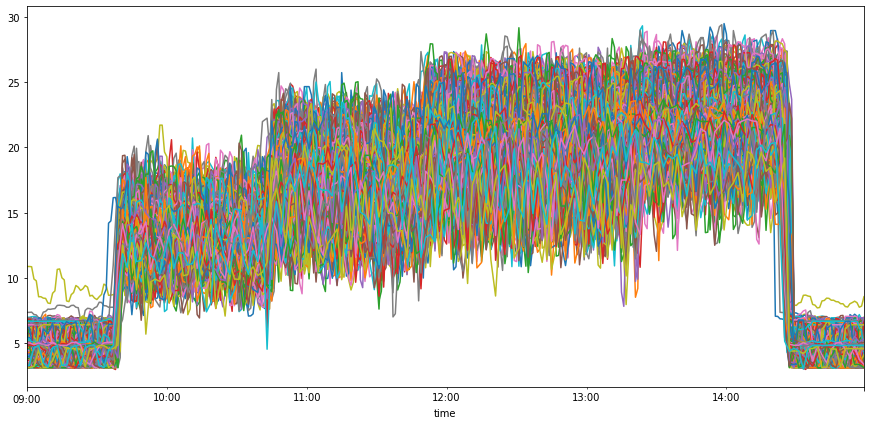

In [58]:
server_deltaT.plot(figsize=(15, 7), legend=False)

In [59]:
#server_powers.plot(figsize=(15, 7), legend=False)

In [60]:
#server_fans_rpm.plot(figsize=(15, 7), legend=False)